# 

- **Answer Set** : NO. 01
- **Full Name** : Fatemeh Karimi Barikarasfi
- **Student Code** : 610301060



In [ ]:
This homework contains 2 problems of Linear Regression.

## Importing Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import sklearn.metrics

from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

## 1.

### a.

**Question**: Fit a fifth-degree polynomial regression to a dataset.

Load the dataset:

In [4]:
train_set1 = pd.read_csv('HW2_P1_train_set.csv')
test_set1 = pd.read_csv('HW2_P1_test_set.csv')
train_set1 = pd.read_csv('HW2_P1_train_set.csv')
test_set1 = pd.read_csv('HW2_P1_test_set.csv')
train_set1

,x,target
0,2.391265,0.692274
1,4.214828,4.078137
2,2.801953,2.614283
3,2.448590,1.465649
4,4.671812,-1.863850
...,...,...
195,5.254647,-0.334566
196,2.846755,3.444166
197,2.840102,-2.104304
198,1.618443,0.727167


Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the 5:

In [6]:
x_train1 = PolynomialFeatures(degree = 5)
x_train1 = x_train1.fit_transform(np.array(train_set1.x).reshape(-1, 1))

y_train1 = np.array(train_set1.target)

x_test1 = PolynomialFeatures(degree = 5)
x_test1 = x_test1.fit_transform(np.array(test_set1.x).reshape(-1, 1))

y_test1 = np.array(test_set1.target)
x_train1

array([[1.00000000e+00, 2.39126520e+00, 5.71814926e+00, 1.36736113e+01,
        3.26972309e+01, 7.81877504e+01],
       [1.00000000e+00, 4.21482800e+00, 1.77647751e+01, 7.48754714e+01,
        3.15587233e+02, 1.33014591e+03],
       [1.00000000e+00, 2.80195260e+00, 7.85093837e+00, 2.19979572e+01,
        6.16372333e+01, 1.72704606e+02],
       ...,
       [1.00000000e+00, 2.84010200e+00, 8.06617937e+00, 2.29087722e+01,
        6.50632496e+01, 1.84786265e+02],
       [1.00000000e+00, 1.61844270e+00, 2.61935677e+00, 4.23927885e+00,
        6.86102991e+00, 1.11041838e+01],
       [1.00000000e+00, 1.55362700e-01, 2.41375686e-02, 3.75007782e-03,
        5.82622216e-04, 9.05177605e-05]])

Fit linear model using LinearRegression to the feature matrix:

In [7]:
reg = LinearRegression()
reg.fit(x_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression coefficients:

In [8]:
reg.coef_

array([ 0.        ,  0.41741085,  1.17048501, -0.73986671,  0.13511055,
       -0.00772431])

MSE of the on the test set:

In [10]:
yhat = reg.predict(x_test1)
mse_test = sklearn.metrics.mean_squared_error(y_test1, yhat)
mse_test

0.09615550335250969

MSE of the on the train set:

In [11]:
mse_train = sklearn.metrics.mean_squared_error(y_train1, reg.predict(x_train1))
mse_train

3.089566381827957

Plot the real and predicted values of train and test data:

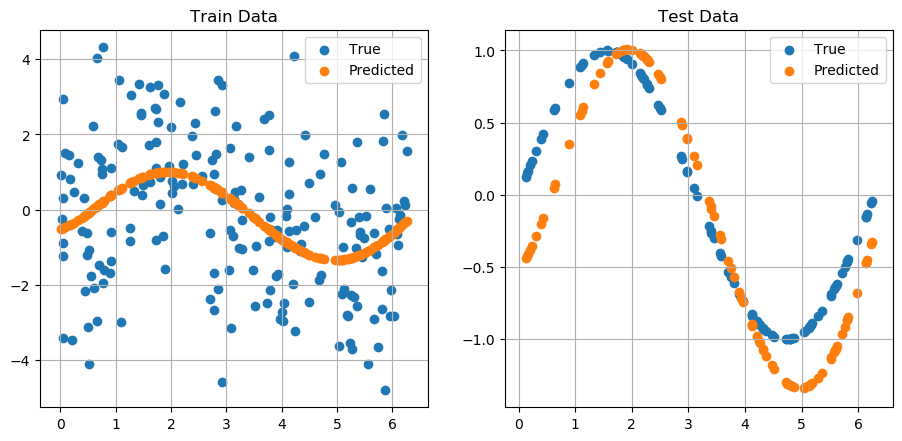

In [12]:
plt.figure(figsize = (11, 5), dpi = 100)
plt.subplot(1, 2, 1)
plt.scatter(train_set1.x, y_train1, label = 'True')
plt.scatter(train_set1.x, reg.predict(x_train1), label = 'Predicted')
plt.legend()
plt.grid()
plt.title('Train Data')

plt.subplot(1, 2, 2)
plt.scatter(test_set1.x, y_test1, label = 'True')
plt.scatter(test_set1.x, yhat, label = 'Predicted')
plt.legend()
plt.grid()
plt.title('Test Data')
plt.show()

### b.
**Question:** Uning N = 10, 25, 50, 100, 200 samples of train set for training the previous model.

#### N = 10

In [13]:
# N = 10
reg_10 = LinearRegression()
reg_10.fit(x_train1[0: 10], y_train1[0: 10])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print('Coeffitient for N = 10 is :', reg_10.coef_)

Coeffitient for N = 10 is : [   0.         -421.97368821  239.9281351   -65.3104994     8.54769456
   -0.43283447]


In [16]:
yhat_10 = reg_10.predict(x_test1)
mse_test_10 = sklearn.metrics.mean_squared_error(y_test1, yhat_10)
print('MSE error for N = 10 in test set is :', mse_test_10)

MSE error for N = 10 in test set is : 3421.4524455827823


In [17]:
mse_train_10 = sklearn.metrics.mean_squared_error(y_train1[0: 10], reg_10.predict(x_train1[0: 10]))
print('MSE error for N = 10 in train set is :', mse_train_10)

MSE error for N = 10 in train set is : 1.7582889199969873


Plot the True and Predicted values for the model which trained with 10 samples of train set:

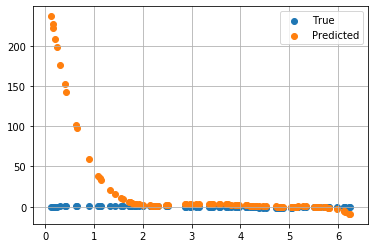

In [18]:
plt.scatter(test_set1.x, y_test1, label = 'True')
plt.scatter(test_set1.x, yhat_10, label = 'Predicted')
plt.legend()
plt.grid()
plt.show()

#### N = 25

In [19]:
# N = 25
reg_25 = LinearRegression()
reg_25.fit(x_train1[0: 25], y_train1[0: 25])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print('Coeffitient for N = 25 is :', reg_25.coef_)

Coeffitient for N = 25 is : [ 0.          5.76250132 -4.57263022  1.67176263 -0.28769114  0.01808571]


In [22]:
yhat_25 = reg_25.predict(x_test1)
mse_test_25 = sklearn.metrics.mean_squared_error(y_test1, yhat_25)
print('MSE error for N = 10 in test set is :', mse_test_25)

MSE error for N = 10 in test set is : 1.0655501749139116


In [23]:
mse_train_25 = sklearn.metrics.mean_squared_error(y_train1[0: 25], reg_25.predict(x_train1[0: 25]))
print('MSE error for N = 10 in train set is :', mse_train_25)

MSE error for N = 10 in train set is : 3.581753357884903


Plot the True and Predicted values for the model which trained with 25 samples of train set:

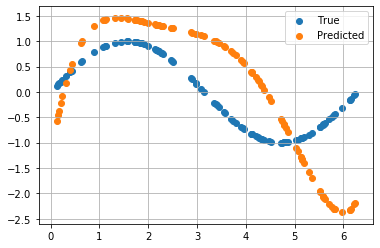

In [24]:
plt.scatter(test_set1.x, y_test1, label = 'True')
plt.scatter(test_set1.x, yhat_25, label = 'Predicted')
plt.legend()
plt.grid()
plt.show()

#### N = 50

In [25]:
# N = 50
reg_50 = LinearRegression()
reg_50.fit(x_train1[0: 50], y_train1[0: 50])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
yhat_50 = reg_50.predict(x_test1)

In [28]:
yhat_50 = reg_50.predict(x_test1)
mse_test_50 = sklearn.metrics.mean_squared_error(y_test1, yhat_50)
print('MSE error for N = 50 in test set is :', mse_test_50)

MSE error for N = 50 in test set is : 0.3527823698468558


In [29]:
mse_train_50 = sklearn.metrics.mean_squared_error(y_train1[0: 50], reg_50.predict(x_train1[0: 50]))
print('MSE error for N = 50 in train set is :', mse_train_50)

MSE error for N = 50 in train set is : 3.267410903681594


Plot the True and Predicted values for the model which trained with 50 samples of train set:

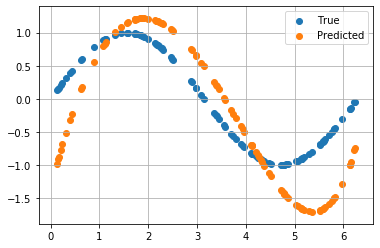

In [30]:
plt.scatter(test_set1.x, y_test1, label = 'True')
plt.scatter(test_set1.x, yhat_50, label = 'Predicted')
plt.legend()
plt.grid()
plt.show()

#### N = 100

In [31]:
# N = 100
reg_100 = LinearRegression()
reg_100.fit(x_train1[0: 100], y_train1[0: 100])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print('Coeffitient for N = 50 is :', reg_100.coef_)

Coeffitient for N = 50 is : [ 0.          0.58160111  0.97851162 -0.62673533  0.10661027 -0.00536244]


In [34]:
yhat_100 = reg_100.predict(x_test1)
mse_test_100 = sklearn.metrics.mean_squared_error(y_test1, yhat_100)
print('MSE error for N = 100 in test set is :', mse_test_100)

MSE error for N = 100 in test set is : 0.15236172527100206


In [35]:
mse_train_100 = sklearn.metrics.mean_squared_error(y_train1[0: 100], reg_100.predict(x_train1[0: 100]))
print('MSE error for N = 100 in train set is :', mse_train_100)

MSE error for N = 100 in train set is : 3.147306732263559


Plot the True and Predicted values for the model which trained with 100 samples of train set:

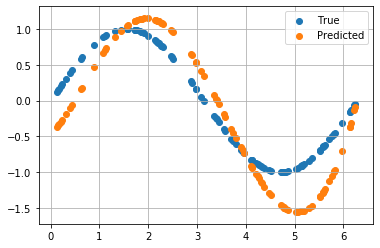

In [36]:
plt.scatter(test_set1.x, y_test1, label = 'True')
plt.scatter(test_set1.x, yhat_100, label = 'Predicted')
plt.legend()
plt.grid()
plt.show()

Plot the MSE error of train and set set for each model:

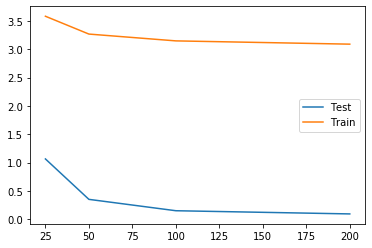

In [38]:
d = [25, 50, 100, 200]
mseTest = [mse_test_25, mse_test_50, mse_test_100, mse_test]
mseTrain = [mse_train_25, mse_train_50, mse_train_100, mse_train]

plt.plot(d, mseTest, label = 'Test')
plt.plot(d, mseTrain, label = 'Train')
plt.legend()
plt.show()

Plot all the True and Predicred values for each models that trained with different value of N samples:

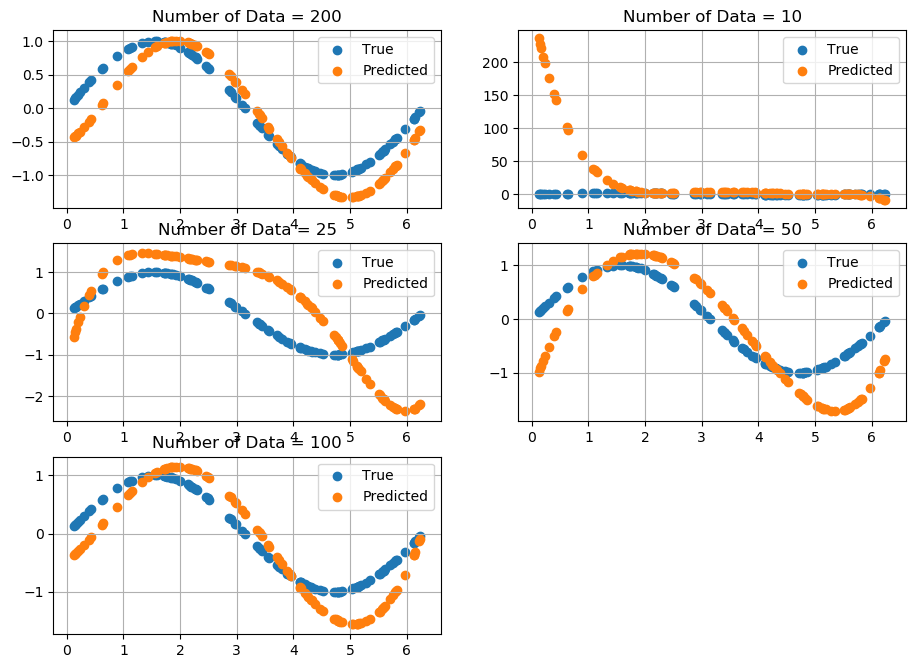

In [39]:
plt.figure(figsize = (11, 8), dpi = 100)
plt.subplot(3, 2, 1)
plt.scatter(test_set1.x, y_test1, label = 'True')
plt.scatter(test_set1.x, yhat, label = 'Predicted')
plt.legend()
plt.grid()
plt.title('Number of Data = 200')

plt.subplot(3, 2, 2)
plt.scatter(test_set1.x, y_test1, label = 'True')
plt.scatter(test_set1.x, yhat_10, label = 'Predicted')
plt.legend()
plt.grid()
plt.title('Number of Data = 10')

plt.subplot(3, 2, 3)
plt.scatter(test_set1.x, y_test1, label = 'True')
plt.scatter(test_set1.x, yhat_25, label = 'Predicted')
plt.legend()
plt.grid()
plt.title('Number of Data = 25')

plt.subplot(3, 2, 4)
plt.scatter(test_set1.x, y_test1, label = 'True')
plt.scatter(test_set1.x, yhat_50, label = 'Predicted')
plt.legend()
plt.grid()
plt.title('Number of Data = 50')

plt.subplot(3, 2, 5)
plt.scatter(test_set1.x, y_test1, label = 'True')
plt.scatter(test_set1.x, yhat_100, label = 'Predicted')
plt.legend()
plt.grid()
plt.title('Number of Data = 100')

plt.show()

## 2.

### a.
**Question:** Normalize the dataset.

Load the dataset:

In [42]:
train_set2 = pd.read_csv('HW2_P2train_set.csv')
test_set2 = pd.read_csv('HW2_P2test_set.csv')
train_set2

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,target
0,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,24.4
1,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88,12.8
2,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34,20.6
3,0.05302,0.0,3.41,0.0,0.489,7.079,63.1,3.4145,2.0,270.0,17.8,396.06,5.70,28.7
4,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.06047,0.0,2.46,0.0,0.488,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15,29.6
402,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50,27.0
403,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81,7.2
404,1.46336,0.0,19.58,0.0,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0


Data Normaalization:

In [44]:
x = scale(train_set2[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13']])
x

array([[-0.39955043,  0.39515436, -0.61781773, ...,  0.0293766 ,
         0.40732006, -0.70593944],
       [ 0.61473147, -0.47345782,  1.01419938, ...,  0.78965714,
         0.42928835,  1.42795883],
       [-0.151998  , -0.47345782,  1.01419938, ...,  0.78965714,
         0.13294295,  0.08423675],
       ...,
       [ 1.42619482, -0.47345782,  1.01419938, ...,  0.78965714,
         0.42928835,  2.5449102 ],
       [-0.25207108, -0.47345782,  1.23102032, ..., -1.82380721,
         0.17484123, -1.55104766],
       [-0.40484598, -0.47345782, -1.1628001 , ..., -0.77842147,
         0.26554534, -0.39043237]])

### b.

**Question:** Fit polynomial regression model with degree = 1, 3, 5 and regularization value = 0, 1, 10  to a dataset. Then, validate all the models with repeated 5 fold cross-validation with 10 repeatation.

Generate three new feature matrices consisting of all polynomial combinations of the features with degree less than or equal to the 1, 3, 5:

In [45]:
# degree = 1
x_train21 = PolynomialFeatures(degree = 1)
x_train21 = x_train21.fit_transform(x)
y_train21 = np.array(train_set2.target)

# degree = 3
x_train23 = PolynomialFeatures(degree = 3)
x_train23 = x_train23.fit_transform(x)
y_train23 = np.array(train_set2.target)

# degree = 5
x_train25 = PolynomialFeatures(degree = 5)
x_train25 = x_train25.fit_transform(x)
y_train25 = np.array(train_set2.target)

#### 1st model : degree = 1, alpha = 0

Create the model : degree = 1, alpha = 0 and validate it:

In [46]:
# degree = 1, alpha = 0
reg1 = linear_model.Ridge(alpha = 0)

# repeated 5 fold cross-validation
mse_train1 = np.empty((10, 5))
mse_test1 = np.empty((10, 5))
for i in range(0, 10):
    X = np.arange(0, len(x_train21))
    kf = KFold(n_splits=5, shuffle = True)
    j = 0
    for train, test in kf.split(X):
        reg1.fit(x_train21[train], y_train21[train])
        mse_train1[i][j] = sklearn.metrics.mean_squared_error(reg1.predict(x_train21[train]), y_train21[train])
        mse_test1[i][j] = sklearn.metrics.mean_squared_error(reg1.predict(x_train21[test]), y_train21[test])
        j = j + 1
mse_train11 = np.empty((10, 1))
mse_test11 = np.empty((10, 1))
for i in range(0, 10):
    mse_test11[i] = mse_test1[i].mean()
    mse_train11[i] = mse_train1[i].mean()
    

MSE of test and train:

In [47]:
mse_test11.mean()

23.8767376101177

In [48]:
mse_train11.mean()

21.107498192860017

Plot the boxplot of every test MSE for all that computed in repeated 5 fold cross-validation:

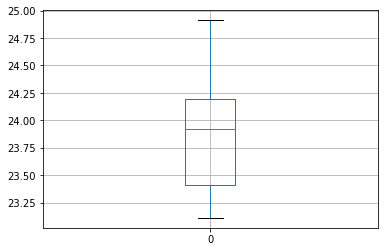

In [49]:
pd.DataFrame(mse_test11.reshape(-1, 1)).boxplot()
plt.show()

#### 2nd model :  degree = 1, alpha = 1

Create the model : degree = 1, alpha = 1 and validate it:

In [50]:
# degree = 1, alpha = 1
reg2 = linear_model.Ridge(alpha = 1)

mse_train2 = np.empty((10, 5))
mse_test2 = np.empty((10, 5))
for i in range(0, 10):
    X = np.arange(0, len(x_train21))
    kf = KFold(n_splits=5, shuffle = True)
    j = 0
    for train, test in kf.split(X):
        reg2.fit(x_train21[train], y_train21[train])
        mse_train2[i][j] = sklearn.metrics.mean_squared_error(reg2.predict(x_train21[train]), y_train21[train])
        mse_test2[i][j] = sklearn.metrics.mean_squared_error(reg2.predict(x_train21[test]), y_train21[test])
        j = j + 1
mse_train22 = np.empty((10, 1))
mse_test22 = np.empty((10, 1))
for i in range(0, 10):
    mse_test22[i] = mse_test2[i].mean()
    mse_train22[i] = mse_train2[i].mean()

MSE of test and train:

In [51]:
mse_test2.mean()

23.86298513818952

In [52]:
mse_train2.mean()

21.109192072059624

Plot the boxplot of every test MSE for all that computed in repeated 5 fold cross-validation:

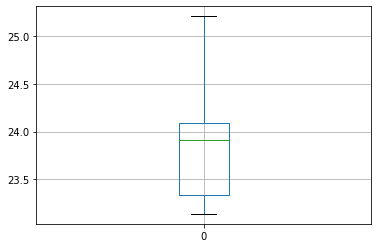

In [53]:
pd.DataFrame(mse_test22.reshape(-1, 1)).boxplot()
plt.show()

#### 3rd model : degree = 1, alpha = 10

Create the model : degree = 1, alpha = 10 and validate it:

In [54]:
# degree = 1, alpha = 10
reg3 = linear_model.Ridge(alpha = 10)

mse_train3 = np.empty((10, 5))
mse_test3 = np.empty((10, 5))
for i in range(0, 10):
    X = np.arange(0, len(x_train21))
    kf = KFold(n_splits=5, shuffle = True)
    j = 0
    for train, test in kf.split(X):
        reg3.fit(x_train21[train], y_train21[train])
        mse_train3[i][j] = sklearn.metrics.mean_squared_error(reg3.predict(x_train21[train]), y_train21[train])
        mse_test3[i][j] = sklearn.metrics.mean_squared_error(reg3.predict(x_train21[test]), y_train21[test])
        j = j + 1
mse_train33 = np.empty((10, 1))
mse_test33 = np.empty((10, 1))
for i in range(0, 10):
    mse_test33[i] = mse_test3[i].mean()
    mse_train33[i] = mse_train3[i].mean()

MSE of test and train:

In [55]:
mse_test33.mean()

23.704166484658852

In [56]:
mse_train33.mean()

21.279023909797967

Plot the boxplot of every test MSE for all that computed in repeated 5 fold cross-validation:

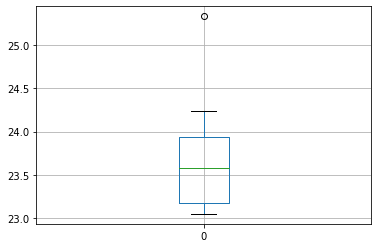

In [57]:
pd.DataFrame(mse_test33.reshape(-1, 1)).boxplot()
plt.show()

#### 4th model : degree = 3, alpha = 0

Create the model : degree = 3, alpha = 0 and validate it:

In [58]:
# degree = 3, alpha = 0
reg4 = linear_model.Ridge(alpha = 0)

mse_train4 = np.empty((10, 5))
mse_test4 = np.empty((10, 5))
for i in range(0, 10):
    X = np.arange(0, len(x_train23))
    kf = KFold(n_splits=5, shuffle = True)
    j = 0
    for train, test in kf.split(X):
        reg4.fit(x_train23[train], y_train23[train])
        mse_train4[i][j] = sklearn.metrics.mean_squared_error(reg4.predict(x_train23[train]), y_train23[train])
        mse_test4[i][j] = sklearn.metrics.mean_squared_error(reg4.predict(x_train23[test]), y_train23[test])
        j = j + 1
mse_train44 = np.empty((10, 1))
mse_test44 = np.empty((10, 1))
for i in range(0, 10):
    mse_test44[i] = mse_test4[i].mean()
    mse_train44[i] = mse_train4[i].mean()

MSE of test and train:

In [59]:
mse_test44.mean()

14515.102850406076

In [60]:
mse_train44.mean()

3.14460168052513e-16

Plot the boxplot of every test MSE for all that computed in repeated 5 fold cross-validation:

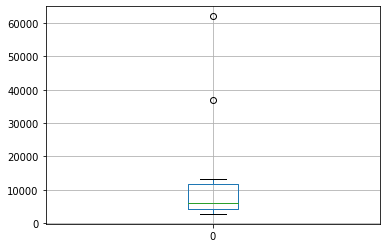

In [61]:
pd.DataFrame(mse_test44.reshape(-1, 1)).boxplot()
plt.show()

#### 5th model : degree = 3, alpha = 1

Create the model : degree = 3, alpha = 1 and validate it:

In [62]:
# degree = 3, alpha = 1
reg5 = linear_model.Ridge(alpha = 1)

mse_train5 = np.empty((10, 5))
mse_test5 = np.empty((10, 5))
for i in range(0, 10):
    X = np.arange(0, len(x_train23))
    kf = KFold(n_splits=5, shuffle = True)
    j = 0
    for train, test in kf.split(X):
        reg5.fit(x_train23[train], y_train23[train])
        mse_train5[i][j] = sklearn.metrics.mean_squared_error(reg5.predict(x_train23[train]), y_train23[train])
        mse_test5[i][j] = sklearn.metrics.mean_squared_error(reg5.predict(x_train23[test]), y_train23[test])
        j = j + 1
mse_train55 = np.empty((10, 1))
mse_test55 = np.empty((10, 1))
for i in range(0, 10):
    mse_test55[i] = mse_test5[i].mean()
    mse_train55[i] = mse_train5[i].mean()

MSE of test and train:

In [63]:
mse_test55.mean()

113.84756339652002

In [64]:
mse_train55.mean()

1.0586378388077968

Plot the boxplot of every test MSE for all that computed in repeated 5 fold cross-validation:

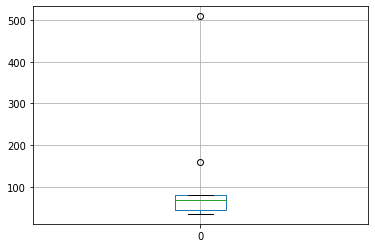

In [65]:
pd.DataFrame(mse_test55.reshape(-1, 1)).boxplot()
plt.show()

#### 6th model : degree = 3, alpha = 10

Create the model : degree = 3, alpha = 10 and validate it:

In [66]:
# degree = 3, alpha = 10
reg6 = linear_model.Ridge(alpha = 10)

mse_train6 = np.empty((10, 5))
mse_test6 = np.empty((10, 5))
for i in range(0, 10):
    X = np.arange(0, len(x_train23))
    kf = KFold(n_splits=5, shuffle = True)
    j = 0
    for train, test in kf.split(X):
        reg6.fit(x_train23[train], y_train23[train])
        mse_train6[i][j] = sklearn.metrics.mean_squared_error(reg6.predict(x_train23[train]), y_train23[train])
        mse_test6[i][j] = sklearn.metrics.mean_squared_error(reg6.predict(x_train23[test]), y_train23[test])
        j = j + 1
mse_train66 = np.empty((10, 1))
mse_test66 = np.empty((10, 1))
for i in range(0, 10):
    mse_test66[i] = mse_test6[i].mean()
    mse_train66[i] = mse_train6[i].mean()

MSE of test and train:

In [67]:
mse_test66.mean()

32.398616693414674

In [68]:
mse_train66.mean()

2.5336624392820357

Plot the boxplot of every test MSE for all that computed in repeated 5 fold cross-validation:

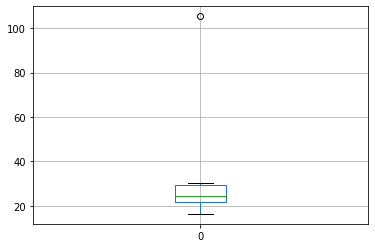

In [69]:
pd.DataFrame(mse_test66.reshape(-1, 1)).boxplot()
plt.show()

#### 7th model : degree = 5, alpha = 0

Create the model : degree = 5, alpha = 0 and validate it:

In [70]:
# degree = 5, alpha = 0
reg7 = linear_model.Ridge(alpha = 0)

mse_train7 = np.empty((10, 5))
mse_test7 = np.empty((10, 5))
for i in range(0, 10):
    X = np.arange(0, len(x_train25))
    kf = KFold(n_splits=5, shuffle = True)
    j = 0
    for train, test in kf.split(X):
        reg7.fit(x_train25[train], y_train25[train])
        mse_train7[i][j] = sklearn.metrics.mean_squared_error(reg7.predict(x_train25[train]), y_train25[train])
        mse_test7[i][j] = sklearn.metrics.mean_squared_error(reg7.predict(x_train25[test]), y_train25[test])
        j = j + 1
mse_train77 = np.empty((10, 1))
mse_test77 = np.empty((10, 1))
for i in range(0, 10):
    mse_test77[i] = mse_test7[i].mean()
    mse_train77[i] = mse_train7[i].mean()

MSE of test and train:

In [71]:
mse_test77.mean()

69242.48685597048

In [72]:
mse_train77.mean()

5.293674722067054e-15

Plot the boxplot of every test MSE for all that computed in repeated 5 fold cross-validation:

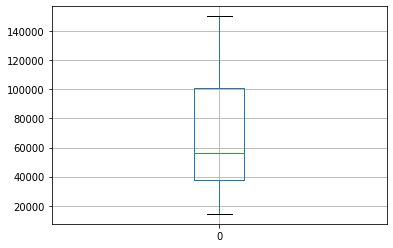

In [73]:
pd.DataFrame(mse_test77.reshape(-1, 1)).boxplot()
plt.show()

#### 8th model : degree = 5, alpha = 1

Create the model : degree = 5, alpha = 1 and validate it:

In [74]:
# degree = 5, alpha = 1
reg8 = linear_model.Ridge(alpha = 1)

mse_train8 = np.empty((10, 5))
mse_test8 = np.empty((10, 5))
for i in range(0, 10):
    X = np.arange(0, len(x_train25))
    kf = KFold(n_splits=5, shuffle = True)
    j = 0
    for train, test in kf.split(X):
        reg8.fit(x_train25[train], y_train25[train])
        mse_train8[i][j] = sklearn.metrics.mean_squared_error(reg7.predict(x_train25[train]), y_train25[train])
        mse_test8[i][j] = sklearn.metrics.mean_squared_error(reg7.predict(x_train25[test]), y_train25[test])
        j = j + 1
mse_train88 = np.empty((10, 1))
mse_test88 = np.empty((10, 1))
for i in range(0, 10):
    mse_test88[i] = mse_test8[i].mean()
    mse_train88[i] = mse_train8[i].mean()

MSE of test and train:

In [75]:
mse_test88.mean()

16.58646021363406

In [76]:
mse_train88.mean()

16.5910573573642

Plot the boxplot of every test MSE for all that computed in repeated 5 fold cross-validation:

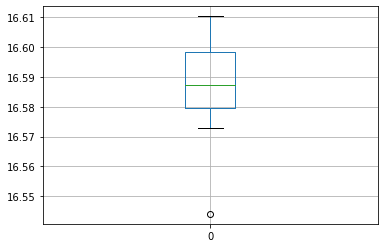

In [77]:
pd.DataFrame(mse_test88.reshape(-1, 1)).boxplot()
plt.show()

#### 9th model : degree = 5, alpha = 10

Create the model : degree = 51, alpha = 10 and validate it:

In [78]:
# degree = 5, alpha = 10
reg9 = linear_model.Ridge(alpha = 10)

mse_train9 = np.empty((10, 5))
mse_test9 = np.empty((10, 5))
for i in range(0, 10):
    X = np.arange(0, len(x_train25))
    kf = KFold(n_splits=5, shuffle = True)
    j = 0
    for train, test in kf.split(X):
        reg9.fit(x_train25[train], y_train25[train])
        mse_train9[i][j] = sklearn.metrics.mean_squared_error(reg9.predict(x_train25[train]), y_train25[train])
        mse_test9[i][j] = sklearn.metrics.mean_squared_error(reg9.predict(x_train25[test]), y_train25[test])
        j = j + 1
mse_train99 = np.empty((10, 1))
mse_test99 = np.empty((10, 1))
for i in range(0, 10):
    mse_test99[i] = mse_test9[i].mean()
    mse_train99[i] = mse_train9[i].mean()

MSE of test and train:

In [79]:
mse_test99.mean()

3524.101680510293

In [80]:
mse_train99.mean()

0.35503878179481096

Plot the boxplot of every test MSE for all that computed in repeated 5 fold cross-validation:

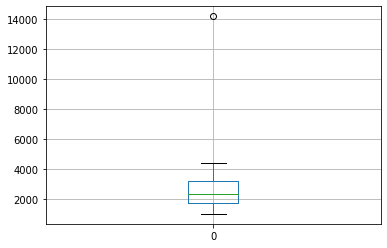

In [81]:
pd.DataFrame(mse_test99.reshape(-1, 1)).boxplot()
plt.show()

## c.

**Question:** Find the best regularization value for the polynomial regression model with degree = 1, 3, 5.

Create the model with degree = 1 and compute the MSE for each value of regularization:

In [82]:
# degree = 1

mse_train41 = np.empty((10, 5))
mse_test41 = np.empty((10, 5))
for i in range(0, 10):
    reg41 = linear_model.Ridge(alpha = i)
    X = np.arange(0, len(x_train21))
    kf = KFold(n_splits=5, shuffle = True)
    j = 0
    for train, test in kf.split(X):
        reg41.fit(x_train21[train], y_train21[train])
        mse_train41[i][j] = sklearn.metrics.mean_squared_error(reg41.predict(x_train21[train]), y_train21[train])
        mse_test41[i][j] = sklearn.metrics.mean_squared_error(reg41.predict(x_train21[test]), y_train21[test])
        j = j + 1
mse_train411 = np.empty(10)
mse_test411 = np.empty(10)
for i in range(0, 10):
    mse_test411[i] = mse_test41[i].mean()
    mse_train411[i] = mse_train41[i].mean()

Plot the MSE values which are computed above:

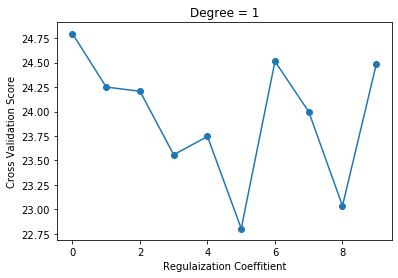

In [83]:
plt.scatter(range(0, 10), mse_test411)
plt.plot(range(0, 10), mse_test411)
plt.xlabel('Regulaization Coeffitient')
plt.ylabel('Cross Validation Score')
plt.title('Degree = 1')
plt.show()

Create the model with degree = 3 and compute the MSE for each value of regularization:

In [84]:
# degree = 3
mse_train43 = np.empty((10, 5))
mse_test43 = np.empty((10, 5))
for i in range(0, 10):
    reg43 = linear_model.Ridge(alpha = i)
    X = np.arange(0, len(x_train23))
    kf = KFold(n_splits=5, shuffle = True)
    j = 0
    for train, test in kf.split(X):
        reg43.fit(x_train23[train], y_train23[train])
        mse_train43[i][j] = sklearn.metrics.mean_squared_error(reg43.predict(x_train23[train]), y_train23[train])
        mse_test43[i][j] = sklearn.metrics.mean_squared_error(reg43.predict(x_train23[test]), y_train23[test])
        j = j + 1
mse_train433 = np.empty(10)
mse_test433 = np.empty(10)
for i in range(0, 10):
    mse_test433[i] = mse_test43[i].mean()
    mse_train433[i] = mse_train43[i].mean()

Plot the MSE values which are computed above:

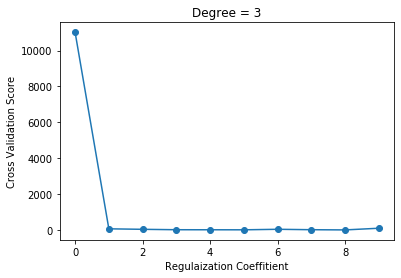

In [85]:
plt.scatter(range(0, 10), mse_test433)
plt.plot(range(0, 10), mse_test433)
plt.xlabel('Regulaization Coeffitient')
plt.ylabel('Cross Validation Score')
plt.title('Degree = 3')
plt.show()

Create the model with degree = 5 and compute the MSE for each value of regularization:

In [86]:
# degree = 5
mse_train45 = np.empty((10, 5))
mse_test45 = np.empty((10, 5))
for i in range(0, 10):
    reg45 = linear_model.Ridge(alpha = i)
    X = np.arange(0, len(x_train25))
    kf = KFold(n_splits=5, shuffle = True)
    j = 0
    for train, test in kf.split(X):
        reg45.fit(x_train25[train], y_train25[train])
        mse_train45[i][j] = sklearn.metrics.mean_squared_error(reg45.predict(x_train25[train]), y_train25[train])
        mse_test45[i][j] = sklearn.metrics.mean_squared_error(reg45.predict(x_train25[test]), y_train25[test])
        j = j + 1
mse_train455 = np.empty(10)
mse_test455 = np.empty(10)
for i in range(0, 10):
    mse_test455[i] = mse_test45[i].mean()
    mse_train455[i] = mse_train45[i].mean()

Plot the MSE values which are computed above:

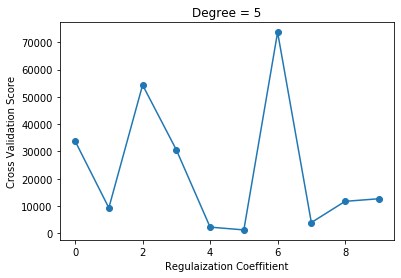

In [87]:
plt.scatter(range(0, 10), mse_test455)
plt.plot(range(0, 10), mse_test455)
plt.xlabel('Regulaization Coeffitient')
plt.ylabel('Cross Validation Score')
plt.title('Degree = 5')
plt.show()

### d.

**Question:** Predict the target value of test set according to the best model that determined in the c. 

In [90]:
xx = scale(test_set2[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13']])
x_test21 = PolynomialFeatures(degree = 1)
x_test21 = x_test21.fit_transform(xx)

REG_Final = linear_model.Ridge(alpha = 1)
REG_Final.fit(x_train21, y_train21)

y_test2 = REG_Final.predict(x_test21)
y_test2

array([20.96314045, 25.07552013, 33.82197878, 13.32769173, 16.64043445,
        0.08708669, 24.25432056, 41.48027058, 35.41251738, 35.00806038,
       23.90171653, 22.2090245 , 23.25517045, 30.13142418, 29.35769764,
        4.09691165,  9.28116035, 21.73355307, 32.73451959, 18.14805997,
       22.33176232, 20.41564682, 26.67191733, 16.87770686, 33.80898337,
       20.32971841, 15.51616382, 33.39281671, 18.33980809, 36.5667186 ,
       24.46885311, 26.50684697, 19.54035129, 28.70538517, 27.08772482,
       22.62189207, 19.27045219, 16.81109597, 19.72692106, 22.65400389,
       29.6078048 , 20.04206704, -2.07895546, 20.47905806, 33.67991068,
       20.4636916 , 19.31772308, 18.27029878, 18.9765702 , 12.96671937,
       17.63392134, 22.07417963, 21.30561094, 33.95229334, 30.72086539,
       27.47693514, 18.47336575, 13.63849147, 21.47970415, 21.77022164,
       18.90706823, 21.13571209,  7.95901623, 24.24350217, 35.34626916,
       28.62185904, 30.6048503 , 34.36212786, 40.52873189, 12.65